In [1]:
import tensorflow as tf
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

11490434/11490434 [==============================] - 1s 0us/step


In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
x_test.shape

(10000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_test.shape

(10000,)

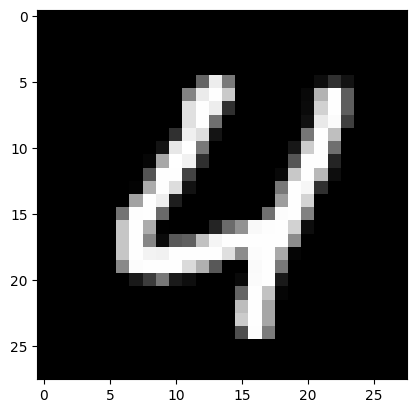

In [34]:
import matplotlib.pyplot as plt
plt.imshow(x_train[64],cmap = 'gray')
plt.show()


In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
x_train[0].max()

255

In [10]:
x_train[0].min()

0

In [11]:
x_train=x_train/225
x_test=x_test/225

In [12]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
[x_train][0].shape

(60000, 28, 28)

In [14]:
y_train[0].shape

()

In [15]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [16]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = x_train[0].shape))#input layer 784 neurons
model.add(tf.keras.layers.Dense(532,activation = 'relu')) #hidden layer ((2/3) * 784+10))=532
model.add(tf.keras.layers.Dense(10,activation='softmax')) #output layer 10 neurons

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 532)               417620    
                                                                 
 dense_1 (Dense)             (None, 10)                5330      
                                                                 
Total params: 422,950
Trainable params: 422,950
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [19]:
model.fit(x_train,y_train,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 11s 3ms/step - loss: 0.1963 - accuracy: 0.9425
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0805 - accuracy: 0.9752
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0517 - accuracy: 0.9841
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0355 - accuracy: 0.9886
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0282 - accuracy: 0.9909
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0221 - accuracy: 0.9929
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0168 - accuracy: 0.9944
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0128 - accuracy: 0.9956
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0140 - accuracy: 0.9954
Epoch 10/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.01

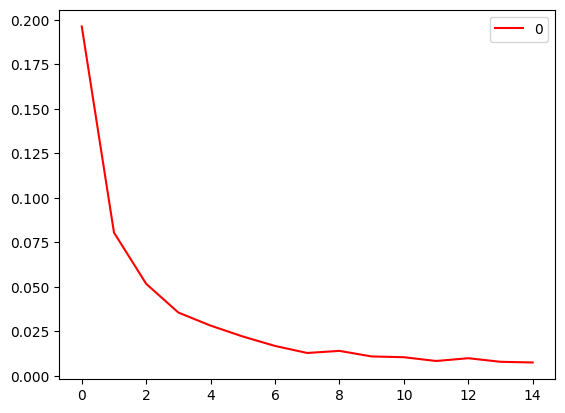

In [20]:
import pandas as pd
loss = pd.DataFrame(model.history.history['loss']).plot(c='r')

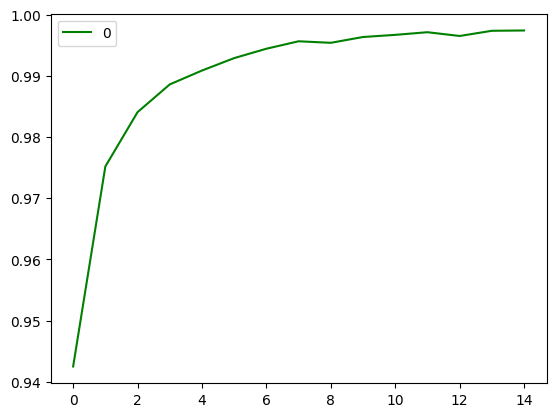

In [21]:
gain = pd.DataFrame(model.history.history['accuracy']).plot(c='g')

In [22]:
import numpy as np
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
y_pred

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [23]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9814

In [25]:
model.get_weights()

[array([[ 0.03657776,  0.03058542, -0.0605544 , ...,  0.00522304,
          0.0263308 ,  0.01300786],
        [-0.04801961, -0.05710269,  0.02253161, ...,  0.06241169,
         -0.01517577, -0.03026518],
        [-0.04083338, -0.03036049, -0.05297896, ...,  0.03728969,
          0.02633408,  0.01321417],
        ...,
        [-0.02777939,  0.04357981, -0.00562482, ..., -0.03348651,
          0.02843236,  0.04250486],
        [ 0.05407527,  0.0600128 , -0.03116416, ...,  0.02342878,
          0.01988303, -0.06084117],
        [-0.01769037, -0.01902906, -0.02066273, ...,  0.05512924,
          0.0315381 , -0.03959129]], dtype=float32),
 array([-7.79276714e-02,  1.72338076e-02,  2.74473764e-02, -1.23284884e-01,
         3.06029115e-02, -4.17505577e-02, -1.38200477e-01, -9.17973518e-02,
        -2.77465791e-01, -8.76726676e-03,  7.89472535e-02,  1.20080508e-01,
        -3.69489789e-02, -3.81590873e-02,  9.75253135e-02, -1.31545633e-01,
        -4.07247804e-02,  7.57898018e-03,  1.97407138e

In [26]:
model.save('handwritten.hdf5')

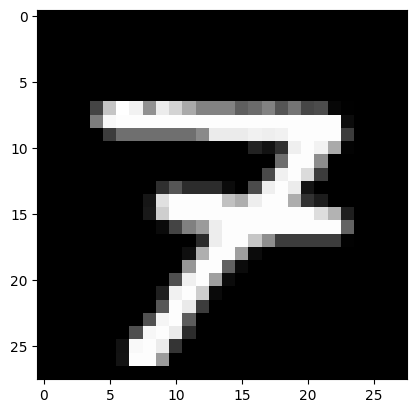

In [58]:
plt.imshow(x_test[64],cmap = 'gray')
plt.show()


In [51]:
y_pred[64]

7

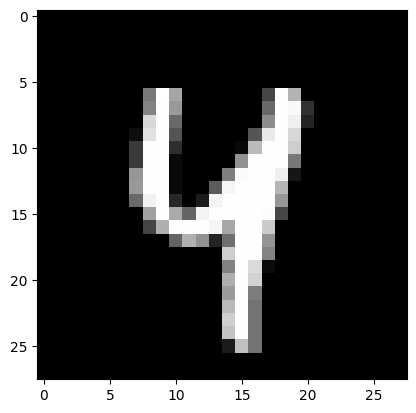

In [57]:
plt.imshow(x_test[42],cmap = 'gray')
plt.show()


In [54]:
y_pred[42]

4

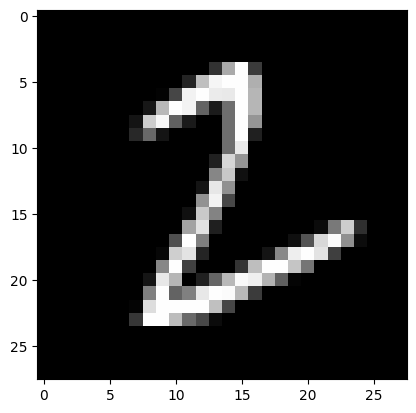

In [56]:
plt.imshow(x_test[38],cmap = 'gray')
plt.show()


In [55]:
y_pred[38]

2

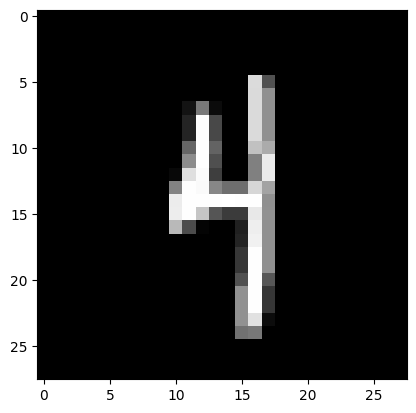

In [60]:
plt.imshow(x_test[65],cmap = 'gray')
plt.show()

In [62]:
y_pred[65]

4

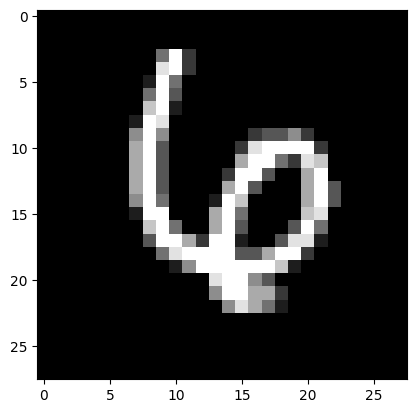

In [61]:
plt.imshow(x_test[22],cmap = 'gray')
plt.show()

In [63]:
y_pred[22]

6